In [1]:
#!/usr/bin/env python
# coding: utf-8
#Run this only once
from mcculw import ul
from mcculw.ul import ULError
from mcculw.enums import ULRange
from mcculw.enums import InterfaceType
from mcculw.enums import BoardInfo
from mcculw.enums import DigitalInfo
from mcculw.enums import InfoType
from time import sleep
import sys
import matplotlib.pyplot as plt
from matplotlib import interactive

board_num = 0
channel = 0
ai_range = ULRange.BIP5VOLTS


print('begin')
devices = ul.get_daq_device_inventory(InterfaceType.ANY)
nose_machine = devices[0]
print(nose_machine)
# we have the 8 8 board

# add device to ul - wat does this do?
ul.create_daq_device(board_num, nose_machine)


ul.get_config(InfoType.DIGITALINFO, board_num, 0, DigitalInfo.DEVTYPE)
ul.get_config(InfoType.DIGITALINFO, board_num, 0, DigitalInfo.NUMBITS)
ul.get_config(InfoType.DIGITALINFO, board_num, 0, DigitalInfo.CURVAL)
ul.get_config(InfoType.DIGITALINFO, board_num, 0, DigitalInfo.INMASK)
ul.get_config(InfoType.DIGITALINFO, board_num, 0, DigitalInfo.OUTMASK)
ul.get_config(InfoType.BOARDINFO, board_num, 0, BoardInfo.DINUMDEVS)
ul.get_config(InfoType.DIGITALINFO, board_num, 0, DigitalInfo.CONFIG)

begin


IndexError: list index out of range

In [2]:
%matplotlib qt

In [3]:
#0 means closed, and 1 means open
#board_num, 1 (always 1), valve number, open or close (1 or 0)
#this makes sure all valves are closed
def close_all():
    
    print('Closing all valves')
    ul.d_bit_out(board_num, 1, 1, 0)
    ul.d_bit_out(board_num, 1, 2, 0)
    ul.d_bit_out(board_num, 1, 3, 0)
    ul.d_bit_out(board_num, 1, 4, 0)
    ul.d_bit_out(board_num, 1, 5, 0)
    ul.d_bit_out(board_num, 1, 6, 0)

#wait 5 seconds
#time.sleep(5)

In [21]:
def red():
    plt.text(0.5,0.5, "+", horizontalalignment='center', verticalalignment='center',color='red', size=50)
    plt.axis('off')
    plt.draw()
    plt.pause(4)
    
def isi():
    plt.text(0.5,0.5, "+",horizontalalignment='center', verticalalignment='center',color='black', size=50)
    plt.axis('off')
    plt.draw()
    plt.pause(10)
    
    
#replace sleep with plt.pause, they do the same thing

In [22]:
isi()

In [46]:
plt.scatter(1,1); plt.pause(5); plt.scatter(2,2)

In [16]:
%matplotlib qt

for i in range(10):    
    isi(1)
    red()
print('hello')
plt.close()


KeyboardInterrupt: 

In [2]:
left_air = ul.d_bit_out(board_num, 1, 1, 1)
right_air = ul.d_bit_out(board_num, 1, 2, 1)

left_air_close = ul.d_bit_out(board_num, 1, 1, 0)
right_air_close = ul.d_bit_out(board_num, 1, 2, 0)

odor_right_close = ul.d_bit_out(board_num, 1, 6, 0)
odor_right = ul.d_bit_out(board_num, 1, 6, 1)

odor_left = ul.d_bit_out(board_num, 1, 5, 1)
odor_left_close = ul.d_bit_out(board_num, 1, 5, 0)

NameError: name 'ul' is not defined

In [14]:
def flush_open():
    
    ul.d_bit_out(board_num, 1, 1, 1)
    ul.d_bit_out(board_num, 1, 2, 1)
    black()
    #print('open air valves')

def flush_close():
    
    ul.d_bit_out(board_num, 1, 1, 0)
    ul.d_bit_out(board_num, 1, 2, 0)
    #print('close air valves')
    
def air_pause():
    flush_close()
    red()
    flush_open()
    
def air_right():
    ul.d_bit_out(board_num, 1, 1, 0)
    ul.d_bit_out(board_num, 1, 3, 1)
    print('hold for 4 seconds')
    red()
    #print('odor right closes')
    ul.d_bit_out(board_num, 1, 1, 1)
    ul.d_bit_out(board_num, 1, 3, 0)

def air_left():
    ul.d_bit_out(board_num, 1, 2, 0)
    ul.d_bit_out(board_num, 1, 3, 1)
    print('hold for 4 seconds')
    red()
    #print('odor right closes')
    ul.d_bit_out(board_num, 1, 2, 1)
    ul.d_bit_out(board_num, 1, 3, 0)
    
def odor_close():
    ul.d_bit_out(board_num, 1, 5, 0)
    ul.d_bit_out(board_num, 1, 6, 0)
    red()
    #print('close valves')
    
def odor_right():
    ul.d_bit_out(board_num, 1, 2, 0)
    ul.d_bit_out(board_num, 1, 1, 1)
    ul.d_bit_out(board_num, 1, 6, 1)
    print('hold for 4 seconds')
    red()
    #print('odor right closes')
    ul.d_bit_out(board_num, 1, 6, 0)
    ul.d_bit_out(board_num, 1, 2, 1)

def odor_left():
    ul.d_bit_out(board_num, 1, 1, 0)
    ul.d_bit_out(board_num, 1, 2, 1)
    ul.d_bit_out(board_num, 1, 5, 1)
    print('Hold for 4 seconds')
    red()
    print('Breathe')
    ul.d_bit_out(board_num, 1, 5, 0)
    ul.d_bit_out(board_num, 1, 1, 1)
    
def odor_both():
    flush_close()
    ul.d_bit_out(board_num, 1, 5, 1)
    ul.d_bit_out(board_num, 1, 6, 1)
    print('Hold for 4 seconds')
    red()
    print ('Breathe')
    odor_close()
    flush_open()

def begin():
    for i in range(10,0,-1):
        sys.stdout.write(str(i)+' ')
        sys.stdout.flush()
        sleep(1)
    print ('Start')

In [15]:
close_all()

Closing all valves


In [29]:
ul.d_bit_out(board_num, 1, 6, 1)
print('open odor right')

open odor right


In [30]:
ul.d_bit_out(board_num, 1, 5, 1)
print('close odor right')

close odor right


In [160]:
flush_open()

In [13]:
#CO2 PARADIGM
flush_open()

plt.text(0.5,0.5, "+",color='black', size=50) #4-6, initialise fixation cross
plt.axis('off')
plt.show()

#Replace all sleep commands with plt.pause or functions defined above

print('Experiment begins in 10 seconds')
begin()

air_left()
#CO2 right

isi(10)


air_pause() #CO2 both

isi(10)

air_right() #CO2 left
isi(10)

air_right() #CO2 left
isi(10)

air_right() #CO2 left
isi(10)

air_left() #CO2 right
sleep(10)

air_pause() #CO2 both
sleep(10)

odor_close() #fake stimulus
sleep(10)

odor_close() #fake stimulus
sleep(10)

odor_close() #fake stimulus
sleep(10)

air_left() #CO2 right
sleep(10)

odor_close() #fake stimulus
sleep(10)

air_pause() #CO2 both
sleep(10)

air_left() #CO2 right
sleep(10)

air_right() #CO2 left
sleep(10)

air_pause() #CO2 both
sleep(10)

odor_close() #fake stimulus
sleep(10)

air_right() #CO2 left
sleep(10)

air_left() #CO2 right
sleep(10)

air_pause() #CO2 both

print('Experiment is finished\nThanks for participating!')
plt.close()

Experiment begins in 10 seconds
10 9 8 7 6 5 4 3 2 1 

KeyboardInterrupt: 

In [46]:
#paradigm begins here
odor_both()
isi
odor_right()

close air valves
odor both
close odor valves
open air valves
odor right for 4 seconds
odor right closes


In [33]:
close_all()

Closing all valves


In [4]:
ul.d_bit_out(board_num, 1, 1, 1)
right_air_close
odor_right
# wait 4 more seconds
time.sleep(4)

odor_right_close
left_air
right_air
time.sleep(10)


ul.d_bit_out(board_num, 1, 3, 1)
ul.d_bit_out(board_num, 1, 6, 1)
time.sleep(1)
ul.d_bit_out(board_num, 1, 3, 0)
ul.d_bit_out(board_num, 1, 6, 0)


# some fancy pulsing
ul.d_bit_out(board_num, 1, 1, 1)
ul.d_bit_out(board_num, 1, 3, 1)
ul.d_bit_out(board_num, 1, 6, 1)
time.sleep(0.3)
ul.d_bit_out(board_num, 1, 2, 1)
ul.d_bit_out(board_num, 1, 1, 0)
ul.d_bit_out(board_num, 1, 4, 1)
time.sleep(0.5)
ul.d_bit_out(board_num, 1, 1, 0)
ul.d_bit_out(board_num, 1, 2, 0)
ul.d_bit_out(board_num, 1, 4, 0)
ul.d_bit_out(board_num, 1, 5, 1)

# close everything
time.sleep(1)
ul.d_bit_out(board_num, 1, 1, 0)
ul.d_bit_out(board_num, 1, 2, 0)
ul.d_bit_out(board_num, 1, 3, 0)
ul.d_bit_out(board_num, 1, 4, 0)
ul.d_bit_out(board_num, 1, 5, 0)
ul.d_bit_out(board_num, 1, 6, 0)

Closing all valves
open valves for 1 s


In [5]:
ul.d_bit_out(board_num, 1, 2, 1)
time.sleep(10)
ul.d_bit_out(board_num, 1, 2, 0)

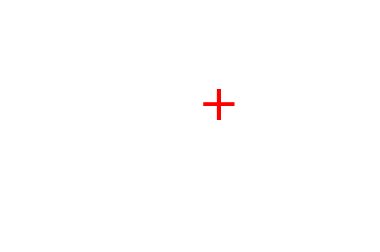

In [11]:
red()